<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture-59-Basic-of-Perceptron-trick-and-Logistic-Regression/Lecture_59_Basic_of_Perceptron_trick_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Generation and Visualization:**

The notebook begins by generating a synthetic 2D classification dataset with two classes using make_classification from scikit-learn. This dataset is then visualized using a scatter plot to show the distribution of the two classes.

# **Perceptron Implementation:**

A simple Perceptron algorithm is implemented from scratch. This implementation includes a step activation function and a perceptron training function that iteratively updates the weights based on misclassified points using a learning rate.

# **Perceptron Decision Boundary:**

The trained Perceptron's learned weights are used to calculate the slope and intercept of the decision boundary line. This boundary is then plotted on the scatter plot to show how the Perceptron separates the classes.

# **Perceptron Training Animation:**

To visualize the learning process of the Perceptron, the perceptron function is modified to store the decision boundary parameters (slope and intercept) at each iteration. This sequence of boundaries is then used to create an animation that shows how the decision boundary evolves during training.

# **Logistic Regression Comparison:**

Finally, a Logistic Regression model from scikit-learn is trained on the same dataset. Its decision boundary is calculated and plotted alongside the Perceptron's decision boundary for comparison, demonstrating the different approaches these two algorithms take to separate the classes.

In [75]:
# importing necessary libraries

from sklearn.datasets import make_classification
import numpy as np


In [76]:
# Generate a synthetic dataset for classification.
# n_samples: number of samples
# n_features: number of features
# n_informative: number of informative features
# n_redundant: number of redundant features
# n_classes: number of classes
# n_clusters_per_class: number of clusters per class
# random_state: seed for random number generation
# hypercube: whether to spread the data within a hypercube
# class_sep: separation between classes

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [77]:
import matplotlib.pyplot as plt

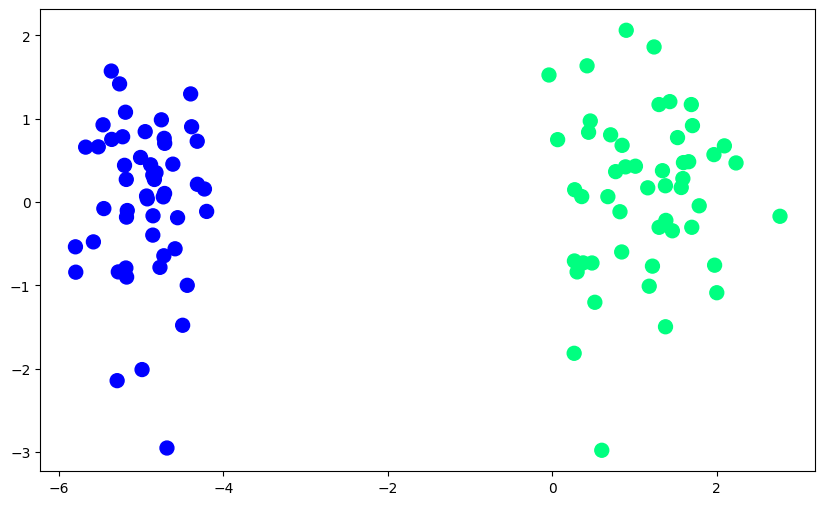

In [78]:
# Create a scatter plot of the generated data.
# X[:,0]: x-coordinates (first feature)
# X[:,1]: y-coordinates (second feature)
# c=y: color points based on their class
# cmap='winter': colormap to use
# s=100: size of the markers

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [79]:
# Define the perceptron function.
# This function trains a simple perceptron model.

def perceptron(X,y):

    # Insert a column of ones for the bias term.
    X = np.insert(X,0,1,axis=1)

     # Initialize weights with ones.

    weights = np.ones(X.shape[1])

     # Set the learning rate.

    lr = 0.1

    # Iterate for a fixed number of epochs.

    for i in range(1000):

        # Randomly select a data point.
        j = np.random.randint(0,100)

        # Calculate the predicted output using the step function.
        y_hat = step(np.dot(X[j],weights))

        # Update the weights based on the error.

        weights = weights + lr*(y[j]-y_hat)*X[j]

    # Return the intercept and coefficients.
    return weights[0],weights[1:]

In [80]:
# Define the step function (activation function).

def step(z):
    return 1 if z>0 else 0

In [81]:
# Train the perceptron model and get the intercept and coefficients.

intercept_,coef_ = perceptron(X,y)

In [82]:
# Print the learned coefficients and intercept.

print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [83]:
# Calculate the slope (m) and intercept (b) of the decision boundary line.

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [84]:
# Generate x-values for the decision boundary line.

x_input = np.linspace(-3,3,100)

# Calculate the corresponding y-values using the learned slope and intercept.

y_input = m*x_input + b

(-3.0, 2.0)

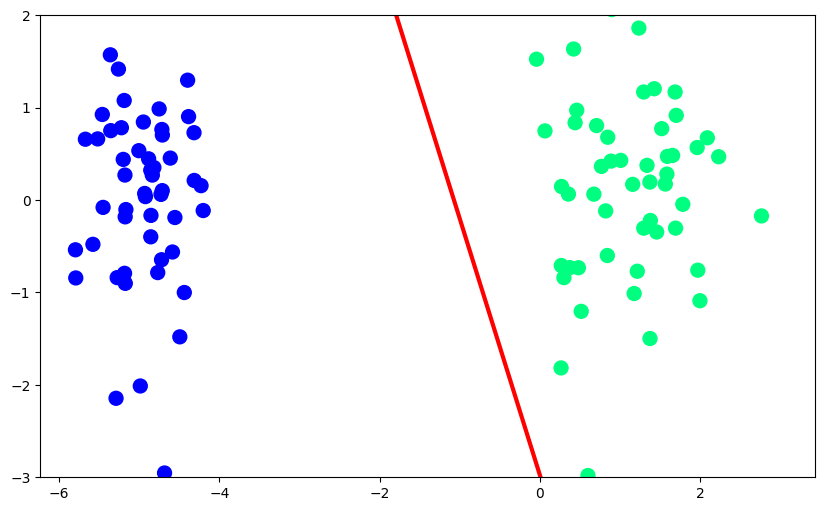

In [85]:
# Plot the data points and the learned decision boundary.

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [86]:
# Redefine the perceptron function to store weights at each iteration for animation.

def perceptron(X,y):

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        # Store the slope and intercept at each iteration.

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [87]:
# Train the perceptron model and get the stored slopes and intercepts.

m,b = perceptron(X,y)

In [88]:
# Import necessary libraries for animation.

%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

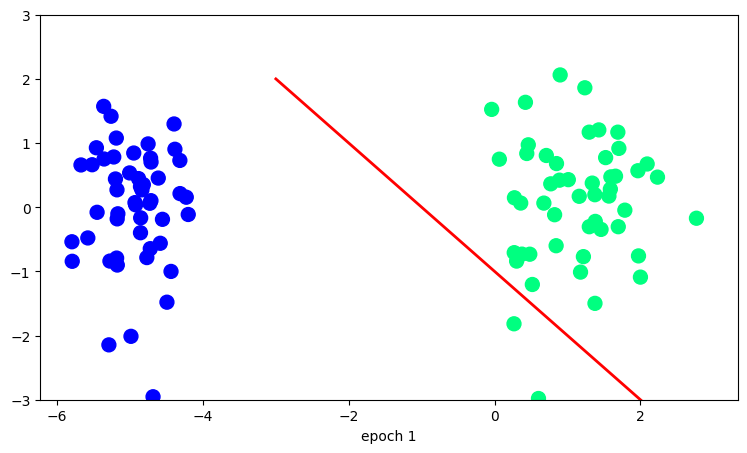

In [89]:
# Create a figure and axis for the animation.

fig, ax = plt.subplots(figsize=(9,5))

# Generate x-values for the line.

x_i = np.arange(-3, 3, 0.1)

# Initial y-values based on the first stored slope and intercept.

y_i = x_i*m[0] +b[0]

# Plot the data points.

ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Plot the initial decision boundary line.

line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)

# Set the y-axis limits.

plt.ylim(-3,3)

# Define the update function for the animation.
# This function updates the y-data of the line at each frame

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

# Create the animation using FuncAnimation.
# fig: the figure to animate
# update: the function to call at each frame
# repeat: whether to repeat the animation
# frames: the number of frames in the animation
# interval: the delay between frames in milliseconds


anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [90]:
# # Display the animation in the notebook.

# display(HTML(anim.to_jshtml()))

In [91]:
# Import and train a Logistic Regression model from scikit-learn.

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [92]:
# Calculate the slope (m) and intercept (b) of the decision boundary
# for the Logistic Regression model.

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [93]:
# Generate x-values for the Logistic Regression decision boundary line.

x_input1 = np.linspace(-3,3,100)

# Calculate the corresponding y-values.

y_input1 = m*x_input + b

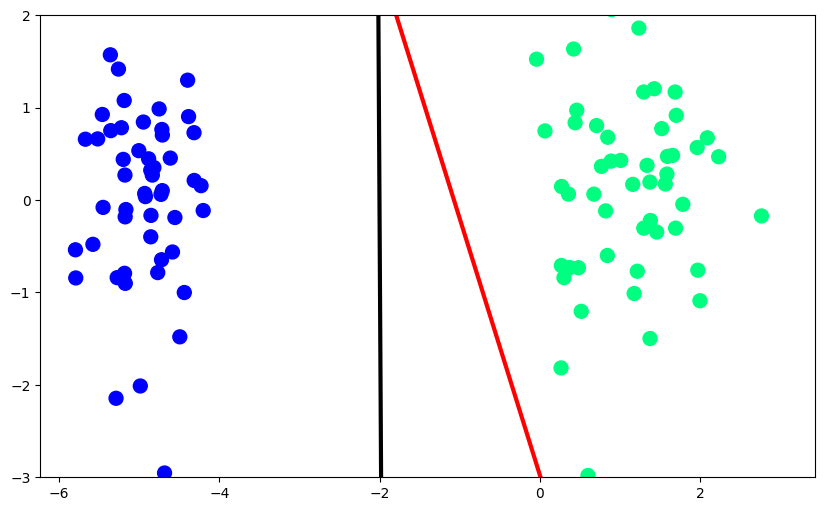

In [94]:
# Plot the data points and both the Perceptron and Logistic Regression
# decision boundaries for comparison.

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

In [95]:
# Define the perceptron function.
# This function trains a simple perceptron model.

def perceptron(X,y):

    # Insert a column of ones for the bias term.
    X = np.insert(X,0,1,axis=1)

     # Initialize weights with ones.

    weights = np.ones(X.shape[1])

     # Set the learning rate.

    lr = 0.1

    # Iterate for a fixed number of epochs.

    for i in range(1000):

        # Randomly select a data point.
        j = np.random.randint(0,100)

        # Calculate the predicted output using the step function.
        y_hat = sigmoid(np.dot(X[j],weights))

        # Update the weights based on the error.

        weights = weights + lr*(y[j]-y_hat)*X[j]

    # Return the intercept and coefficients.
    return weights[0],weights[1:]

In [96]:
# Define the sigmoid function (activation function).

def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [97]:
# Train the perceptron model and get the intercept and coefficients

intercept_,coef_ = perceptron(X,y)

In [98]:
# Calculate the slope (m) and intercept (b) of the decision boundary

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [99]:
# Generate x-values for the decision boundary line.

# Calculate the corresponding y-values using the learned slope and intercept.

x_input2 = np.linspace(-3,3,100)

y_input2 = m*x_input + b

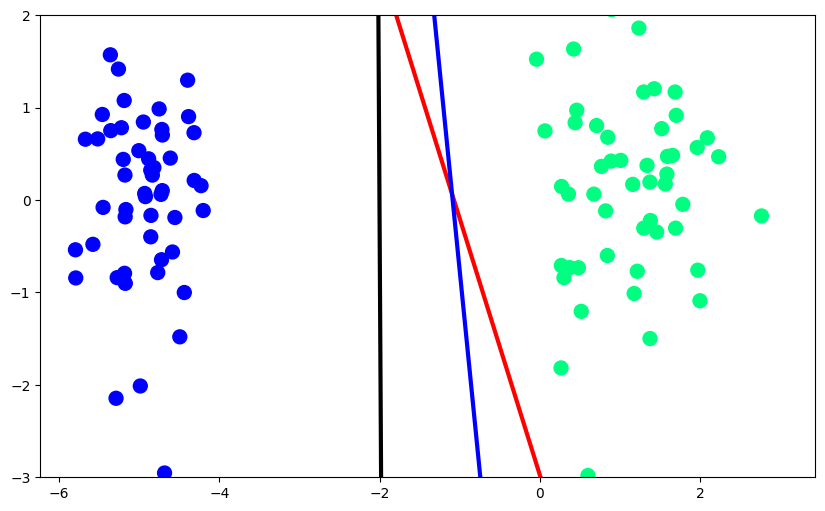

In [100]:
# Plot the data points and both the Perceptron,sigmoid function and Logistic Regression

# decision boundaries for comparison.

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='blue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()
